In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def compute_hypothesis(X, theta):
    return X @ theta

In [3]:
def compute_cost(X, y, theta):
    m = X.shape[0]  # количество примеров в выборке
    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)


In [4]:
def gradient_descend(X, y, theta, alpha, num_iter):
    history = list()
    m = X.shape[0]  # количество примеров в выборке
    n = X.shape[1]  # количество признаков с фиктивным
    for i in range(num_iter):
        theta_temp = theta
        for j in range(len(theta)):
            theta_temp[j] = theta_temp[j] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, j]) / m
        theta = theta_temp
        history.append(compute_cost(X, y, theta))
    return history, theta

In [5]:
def scale_features(X):
    m = X.shape[0]
    n = X.shape[1] - 1

    X = X[:, 1:]
    for i in range(n):
        X[:, i] = (X[:, i] - np.mean(X, axis=0)[i])/np.std(X, axis=0)[i]
    X = np.hstack((np.ones((m, 1)), X))
    return X


In [6]:
def normal_equation(X, y):
    theta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return theta


In [7]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [ ]:
X, y = load_data('lab1data2.txt')

history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 10)

plt.title('График изменения функции стоимости от номера итерации до нормализации')
plt.plot(range(len(history)), history)
plt.show()

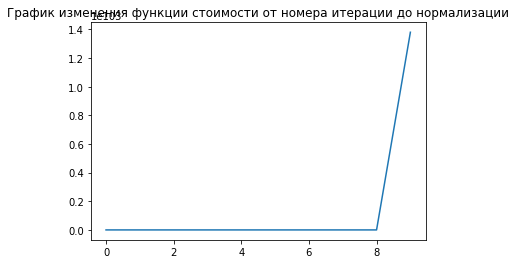

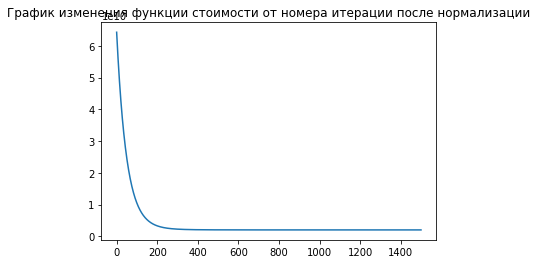

theta, посчитанные через градиентный спуск: [340412.56301439 109371.67272252  -6502.3992545 ],
 через нормальное уравнение: [340412.65957447 109447.79646964  -6578.35485416]


In [8]:
X = scale_features(X)

history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 1500)

plt.title('График изменения функции стоимости от номера итерации после нормализации')
plt.plot(range(len(history)), history)
plt.show()

theta_solution = normal_equation(X, y)
print(f'theta, посчитанные через градиентный спуск: {theta},\n через нормальное уравнение: {theta_solution}')